# Titanic dataset analysis and Model Training

##### Welcome to this Jupyter notebook, where we will explore the Titanic dataset and build predictive models to analyze passenger survival. 
##### This notebook is designed to guide you through the process of data analysis, feature engineering, and model training, providing insights
##### into the factors that influenced survival rates on the Titanic.

# 1. Initial analysis

In [25]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import plotly.express as px

In [26]:
### Load the dataset and set the passanger index as the dataframe index
dataset = pd.read_csv("titanic\\train.csv", index_col ="PassengerId")
dataset['Survived'] = dataset['Survived'].map({0: 'Not Survived', 1: 'Survived'})
dataset['Pclass'] = dataset['Pclass'].map({1: 'First', 2: 'Second', 3: "Third"})

In [27]:
dataset.head(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,Not Survived,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,Survived,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,Survived,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,Survived,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


## Dataset visualisations

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

Let's start by seeing what data is missing?

In [29]:
dataset.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

We can see that we are missing a lot of age data, a lot of Cabin data and and a small number of embarked data. 

Let's take a closer look at these variables

### Gender

Let's start with Gender:

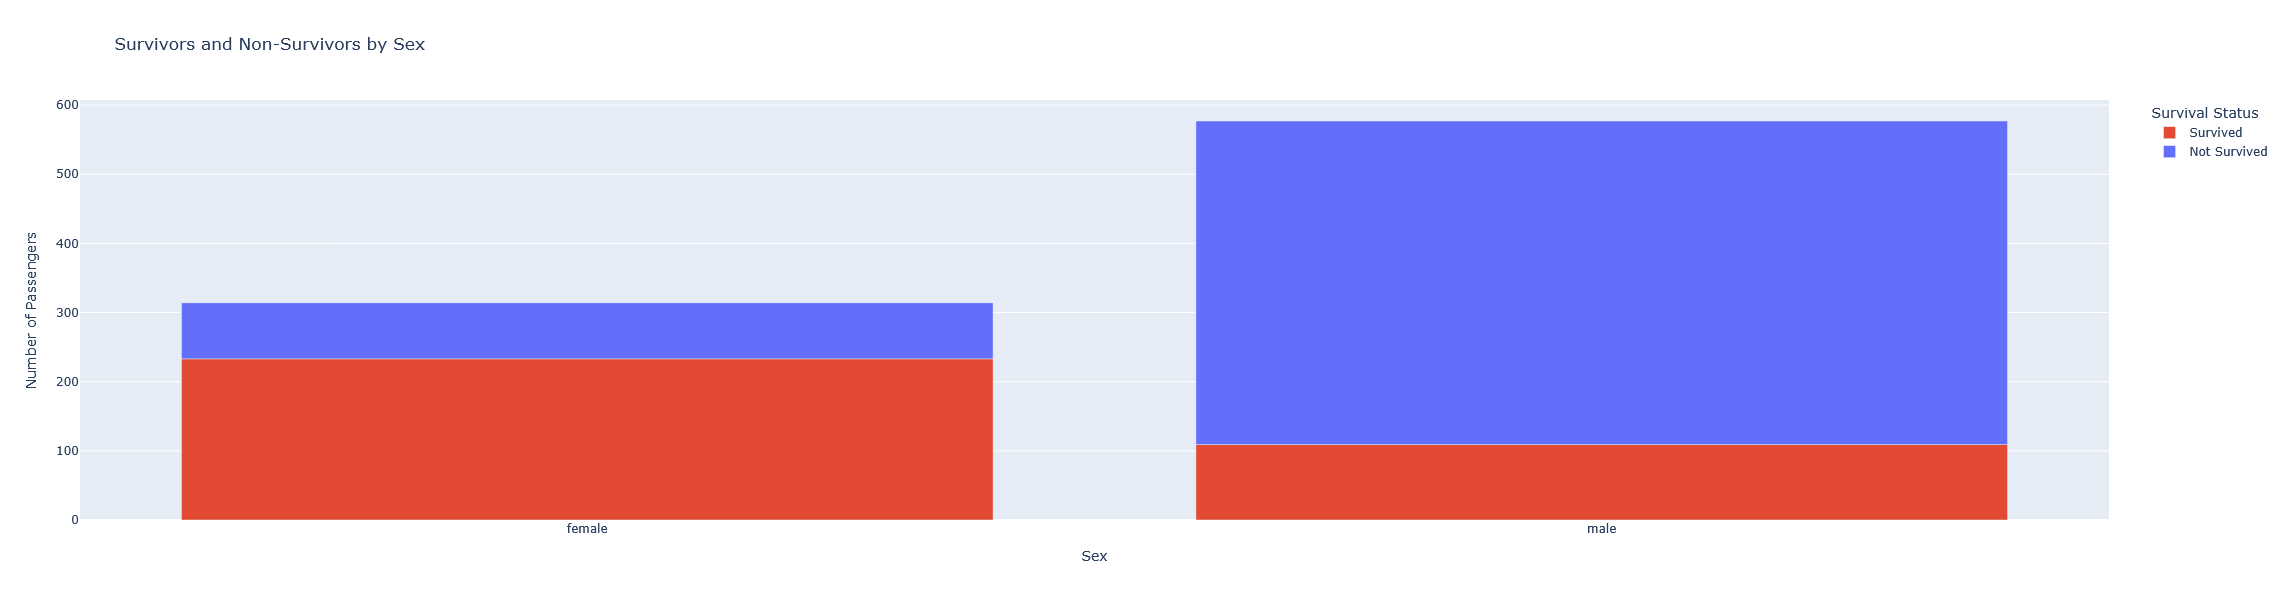

In [30]:
sex_survival_count = dataset.groupby(['Sex', 'Survived']).size().reset_index(name='count')

fig1 = px.bar(sex_survival_count, x="Sex", y="count", color="Survived", barmode="relative",
             labels={"count": "Number of Passengers", "Sex": "Sex", "Survived": "Survival Status"},
             title="Survivors and Non-Survivors by Sex",
             category_orders={"Survived": [ "Survived","Not Survived"]},
             color_discrete_map={"Survived": "#E24A33", "Not Survived": "#636EFA"}
             )

fig1.update_layout(width=800, height=600)
fig1.show()

We can see that a lot more Female passangers survived than male passangers, and at a much higher proportion. This makes sense as protocol dictated that women and children should be saved first

### Class

Below we show how class impacted survivability. Here we can also see that much more passangers survived from first and second class than did from third class. This makes sense as first class passangers were know to be boarded first into lifeboats followed by the second and third class passangers. 

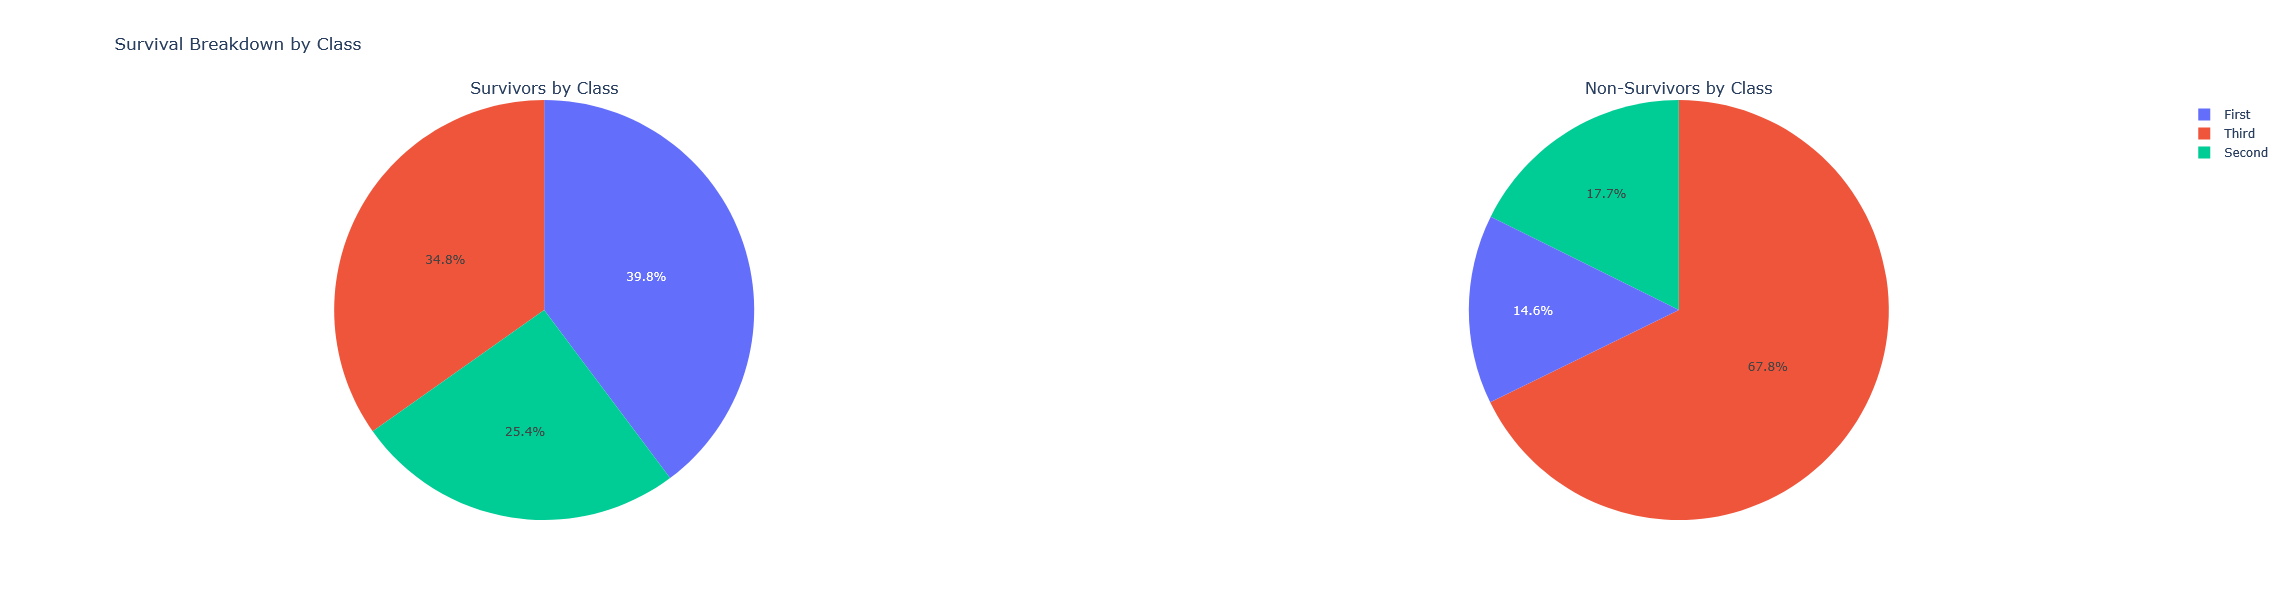

In [31]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Generate the counts
class_survival_count = dataset.groupby(['Pclass', 'Survived']).size().reset_index(name='count')

# Filter data for survivors and non-survivors
survivors_by_class = class_survival_count[class_survival_count['Survived'] == "Survived"]
non_survivors_by_class = class_survival_count[class_survival_count['Survived'] == "Not Survived"]

# Create a subplot with two pie charts
fig2 = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}]], 
                    subplot_titles=("Survivors by Class", "Non-Survivors by Class"))

# Add survivors pie chart
fig2.add_trace(go.Pie(labels=survivors_by_class['Pclass'], values=survivors_by_class['count']), row=1, col=1)

# Add non-survivors pie chart
fig2.add_trace(go.Pie(labels=non_survivors_by_class['Pclass'], values=non_survivors_by_class['count']), row=1, col=2)

# Update layout for better visualization
fig2.update_layout(title_text="Survival Breakdown by Class", width=800, height=600)

# Show figure
fig2.show()

## Sunburst Chart

We can use a suburst chart to see how these catagorical varaibles break down across the full dataset

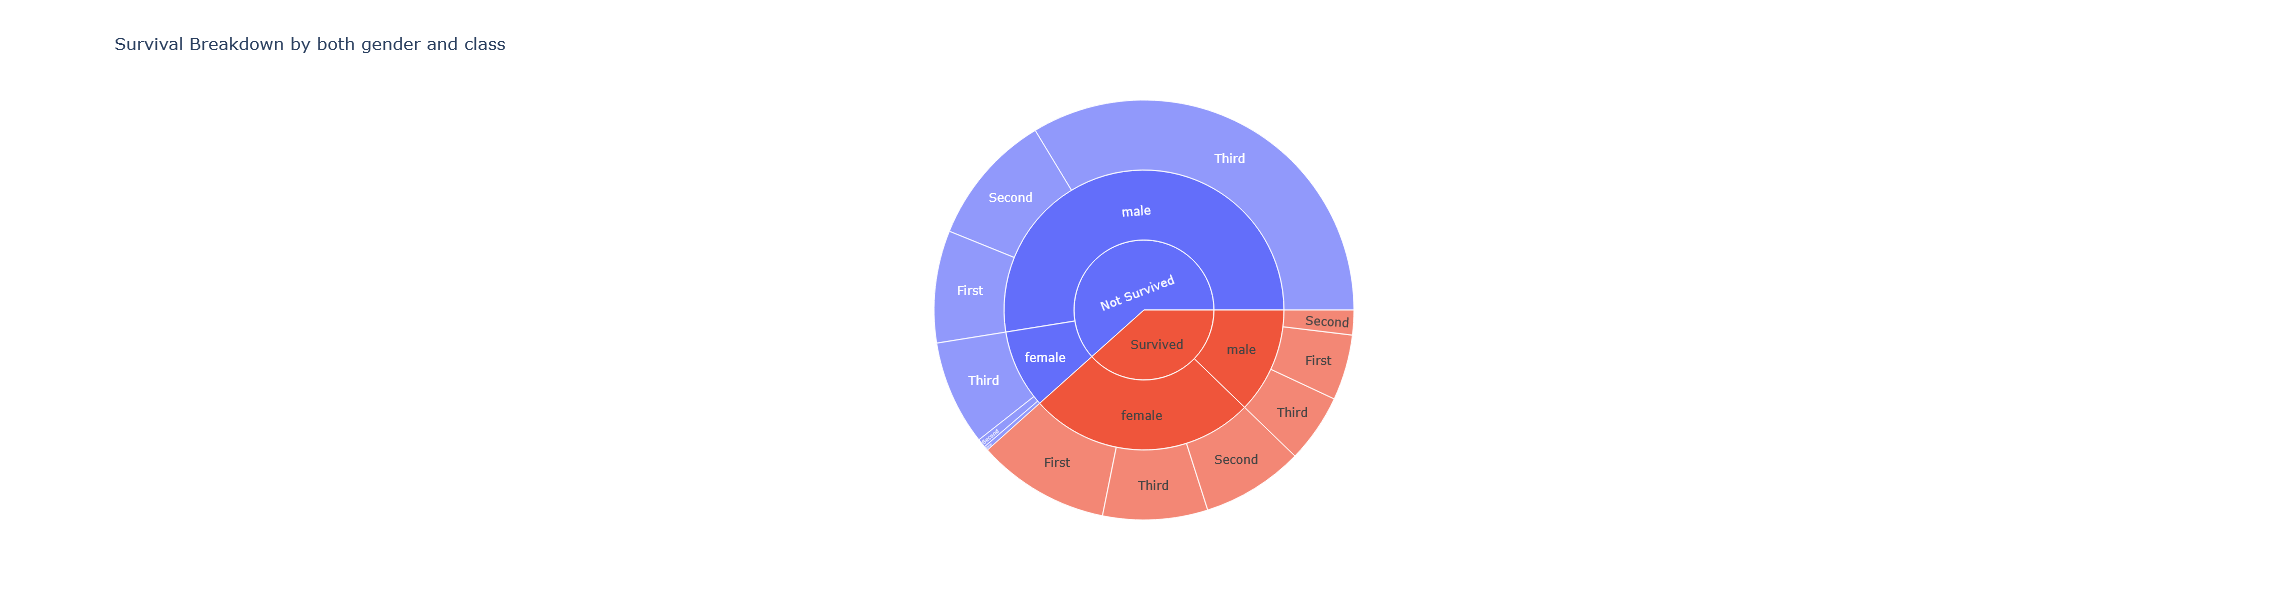

In [32]:
df = dataset.groupby(["Survived", "Pclass", "Sex" ]).size().reset_index(name="count")

fig5B = px.sunburst(df, path=["Survived",  "Sex","Pclass" ], values="count",
                  title="Survival Breakdown by Class and Gender (Passenger Count)")

fig5B.update_layout(title_text="Survival Breakdown by both gender and class", width=800, height=600)
fig5B.show()

This helps us to better understand the relationships between these variables. We can see that that the majority of those who died were male. Furthermore the majority of the males that died were from third class, though almost the same number of first class male passangers did not survive as overall female passangers. 

### Siblings and spouse

The SibSp column refers to the number of people with a sibling or spouse with them. This is a way to tell if someone had family. As we can see below those with no siblings or spouse had a far lower survival chance than those with 1 or more siblings/spouse, though very few people on board had more than 1 SibSp. 

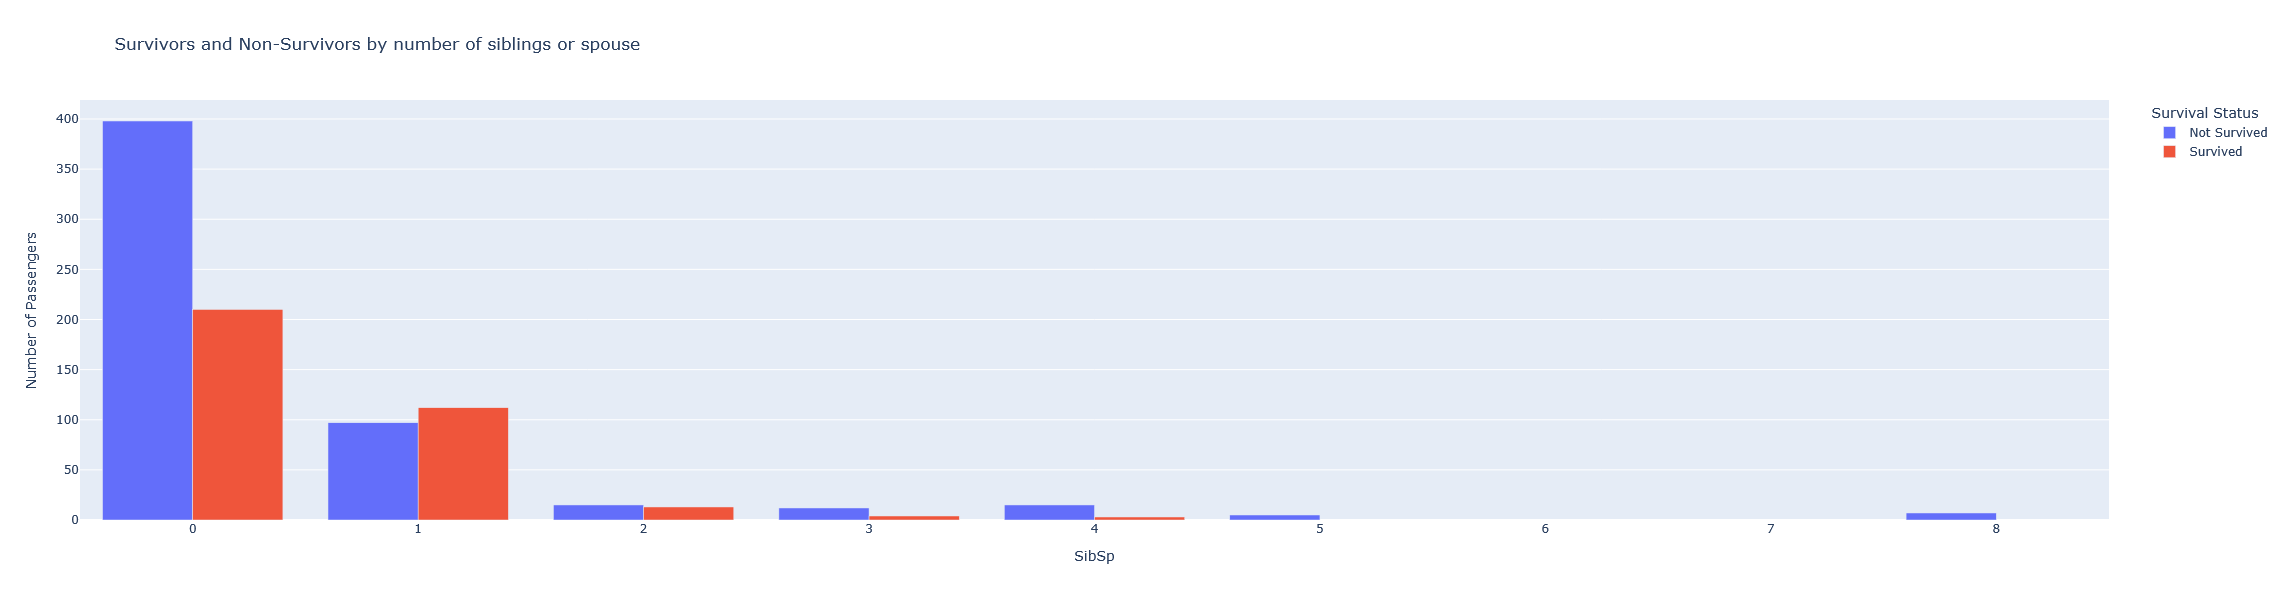

In [33]:
sibsp_survival_count = dataset.groupby(['SibSp', 'Survived']).size().reset_index(name='count')

fig3 = px.bar(sibsp_survival_count, x="SibSp", y="count", color="Survived", barmode="group",
             labels={"count": "Number of Passengers", "Class": "Class", "Survived": "Survival Status"},
             title="Survivors and Non-Survivors by number of siblings or spouse")

fig3.update_layout(width=1200, height=600)
fig3.show()

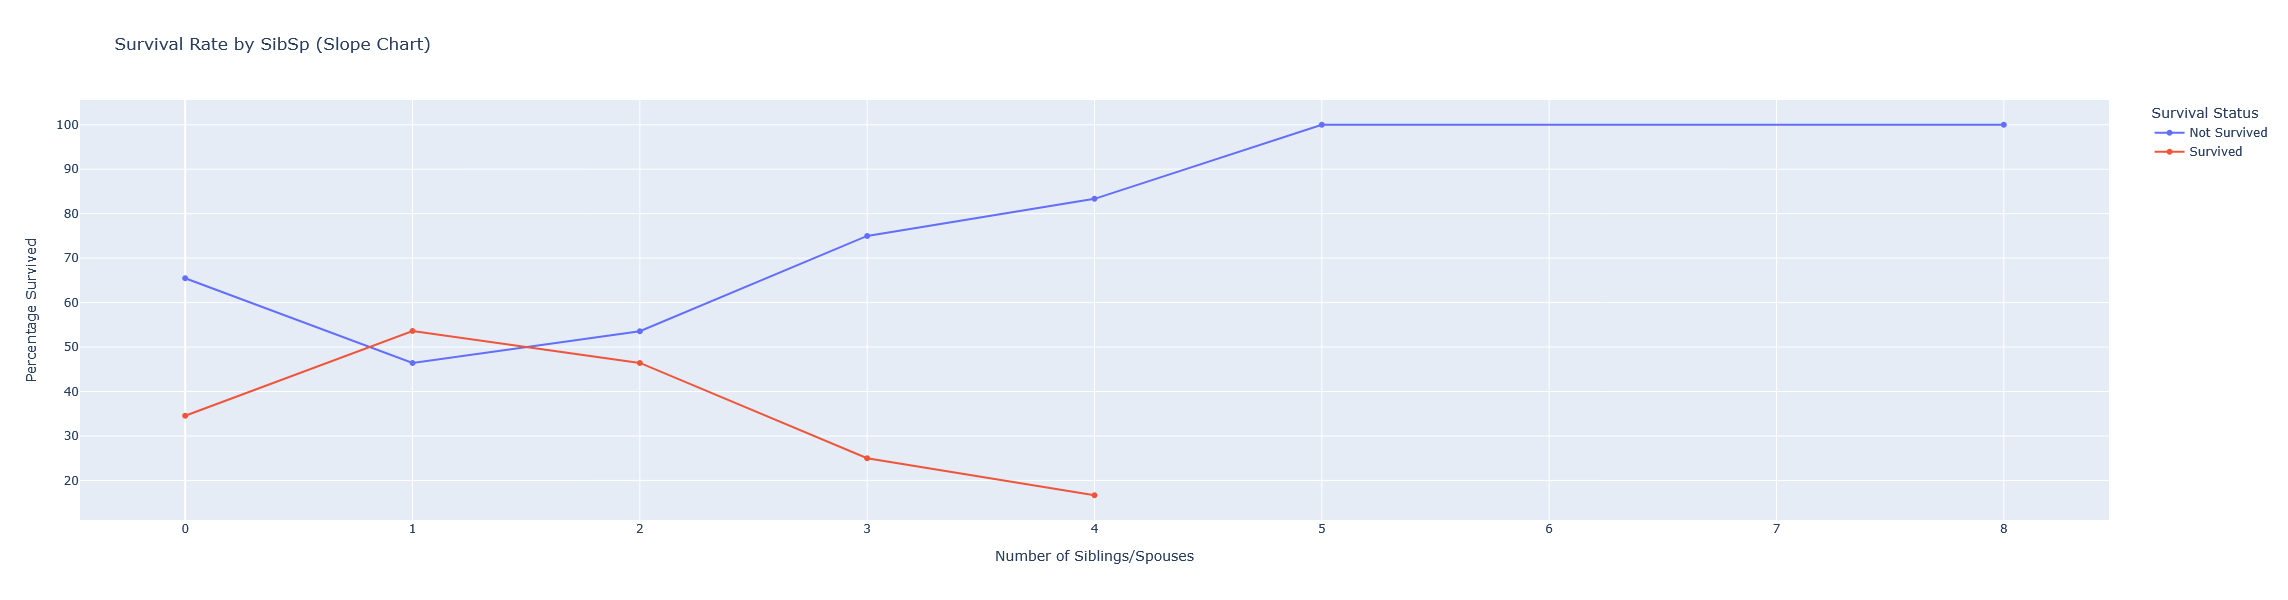

In [61]:
# Group and calculate survival percentages
sibsp_counts = dataset.groupby("SibSp")["Survived"].value_counts(normalize=True).unstack() * 100
sibsp_counts.reset_index(inplace=True)

# Reshape for slope chart format
sibsp_long = sibsp_counts.melt(id_vars=["SibSp"], value_name="Survival Rate", var_name="Survival Status")

# Plotly Slope Chart
fig7 = px.line(sibsp_long, x="SibSp", y="Survival Rate", color="Survival Status",
               markers=True, title="Survival Rate by SibSp (Slope Chart)",
               labels={"SibSp": "Number of Siblings/Spouses", "Survival Rate": "Percentage Survived"})

# Adjust layout
fig7.update_layout(width=1200, height=600)
fig7.show()

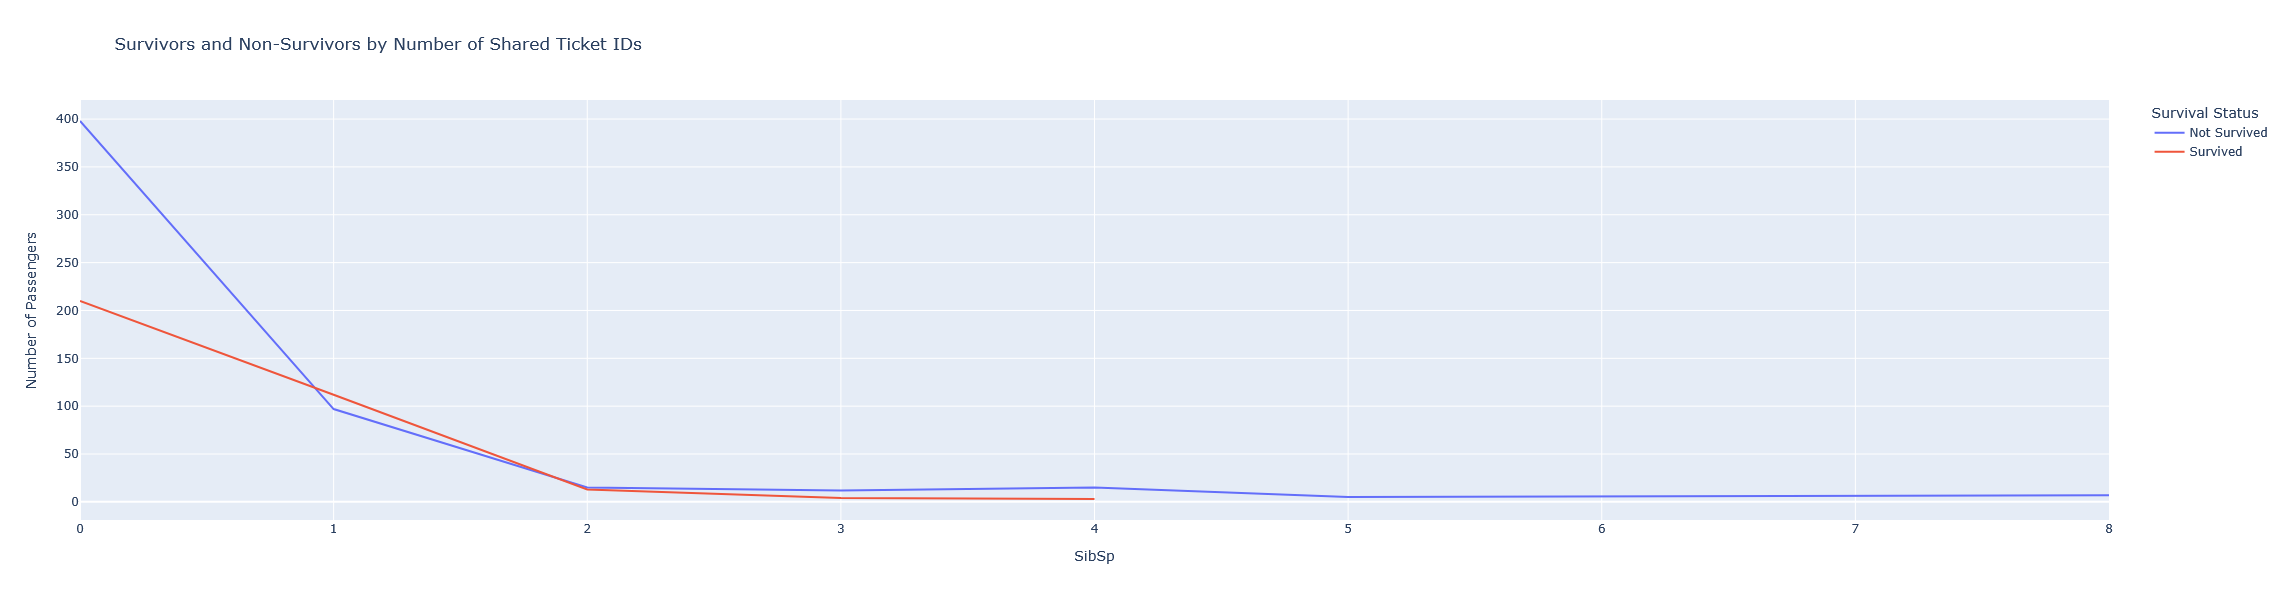

In [57]:
# Grouping data
sibsp_survival_count = dataset.groupby(['SibSp', 'Survived']).size().reset_index(name='count')

# Creating line plot
fig3 = px.line(sibsp_survival_count, x="SibSp", y="count", color="Survived",
               labels={"count": "Number of Passengers", "Ticket_Count": "Shared Ticket IDs", "Survived": "Survival Status"},
               title="Survivors and Non-Survivors by Number of Shared Ticket IDs")

# Adjusting layout
fig3.update_layout(width=1200, height=600)
fig3.show()

### Embarkment point

We can also investigate if there is any relationship on where the individual embarked Titanic. The Values in this column are categorical and refer to the following locations:



| Letter       | Location |
|-------------|----------|
| C | Cherbourg, France      |
| Q| Queenstown (now Cobh), Ireland      |
| S | Southampton, England     |


and we can see that there are some corelations with Embarkment point and survival, with those boarding in Cherbourg having a higher likelyhood of survival than those who boarded in Queenstown or in Southampton

we can use a slinkey plot to help viualise how this impacted survival 

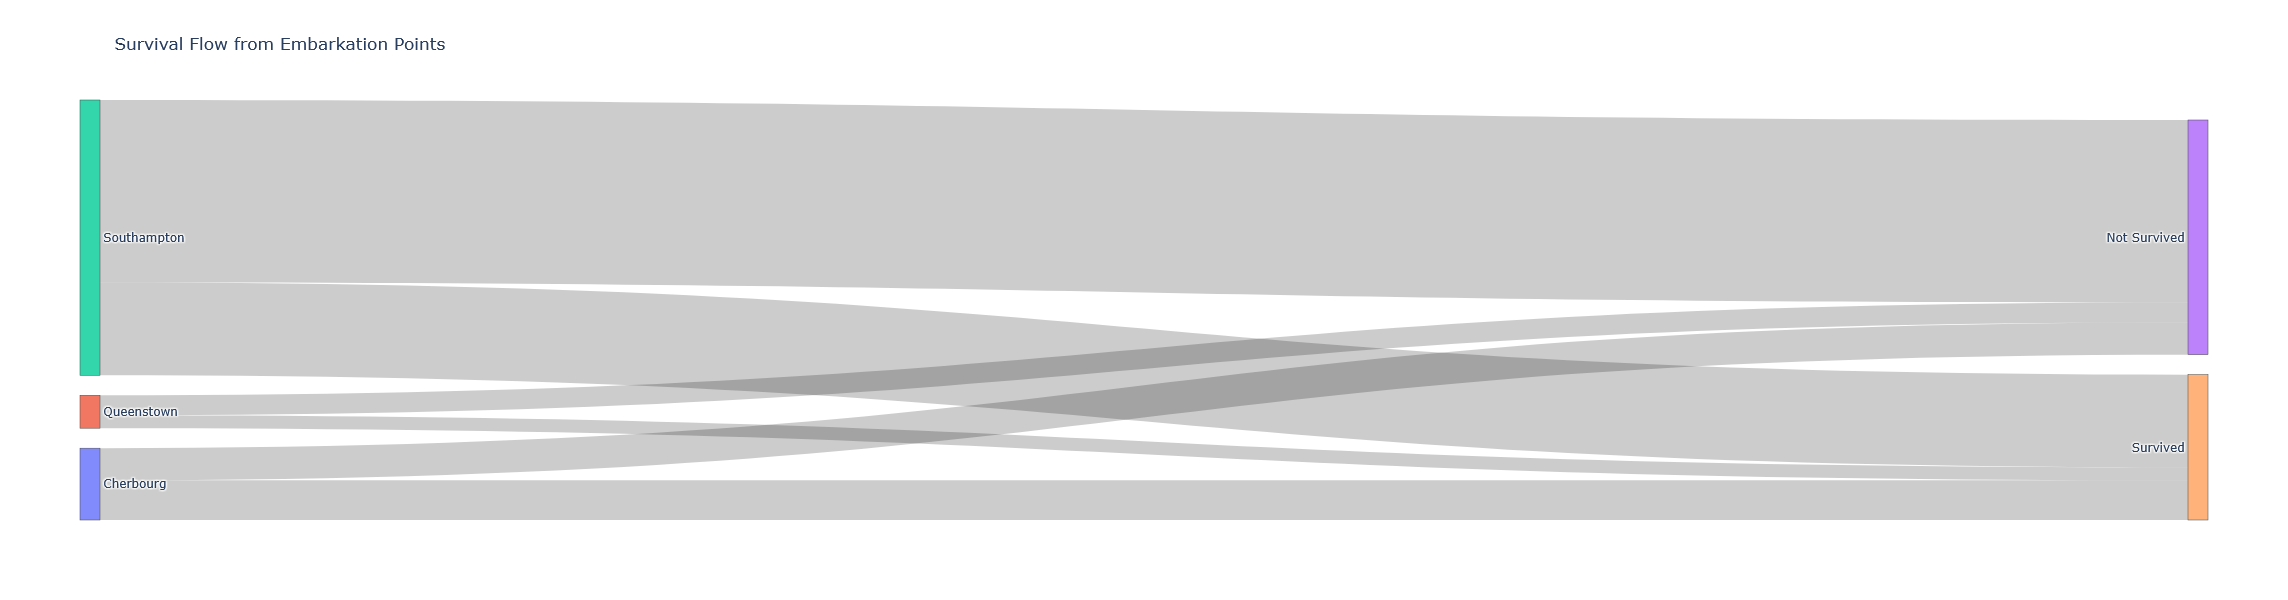

In [34]:

# Define mapping for port names
port_names = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

# Prepare data for Sankey diagram
embark_survival = dataset.groupby(['Embarked', 'Survived']).size().reset_index(name='count')

# Replace embarkation codes with full port names
embark_survival['Embarked'] = embark_survival['Embarked'].map(port_names)

# Extract unique labels (Embarkation points + Survived categories)
labels = list(embark_survival['Embarked'].unique()) + list(embark_survival['Survived'].unique())

# Create source-target mapping
sources = embark_survival['Embarked'].apply(lambda x: labels.index(x)).tolist()
targets = embark_survival['Survived'].apply(lambda x: labels.index(x)).tolist()
values = embark_survival['count'].tolist()

# Create the Sankey diagram
fig4 = go.Figure(go.Sankey(
    node=dict(label=labels),
    link=dict(source=sources, target=targets, value=values)
))

# Adjust layout
fig4.update_layout(width=1200, height=600, title_text="Survival Flow from Embarkation Points", font_size=12)
fig4.show()

## Age

Age was also an important factor in whether an individual survived or not. Famously women and children were boarded first. Aditionally younger people may have been prioritised over the elderly for a place on the lifeboat. 

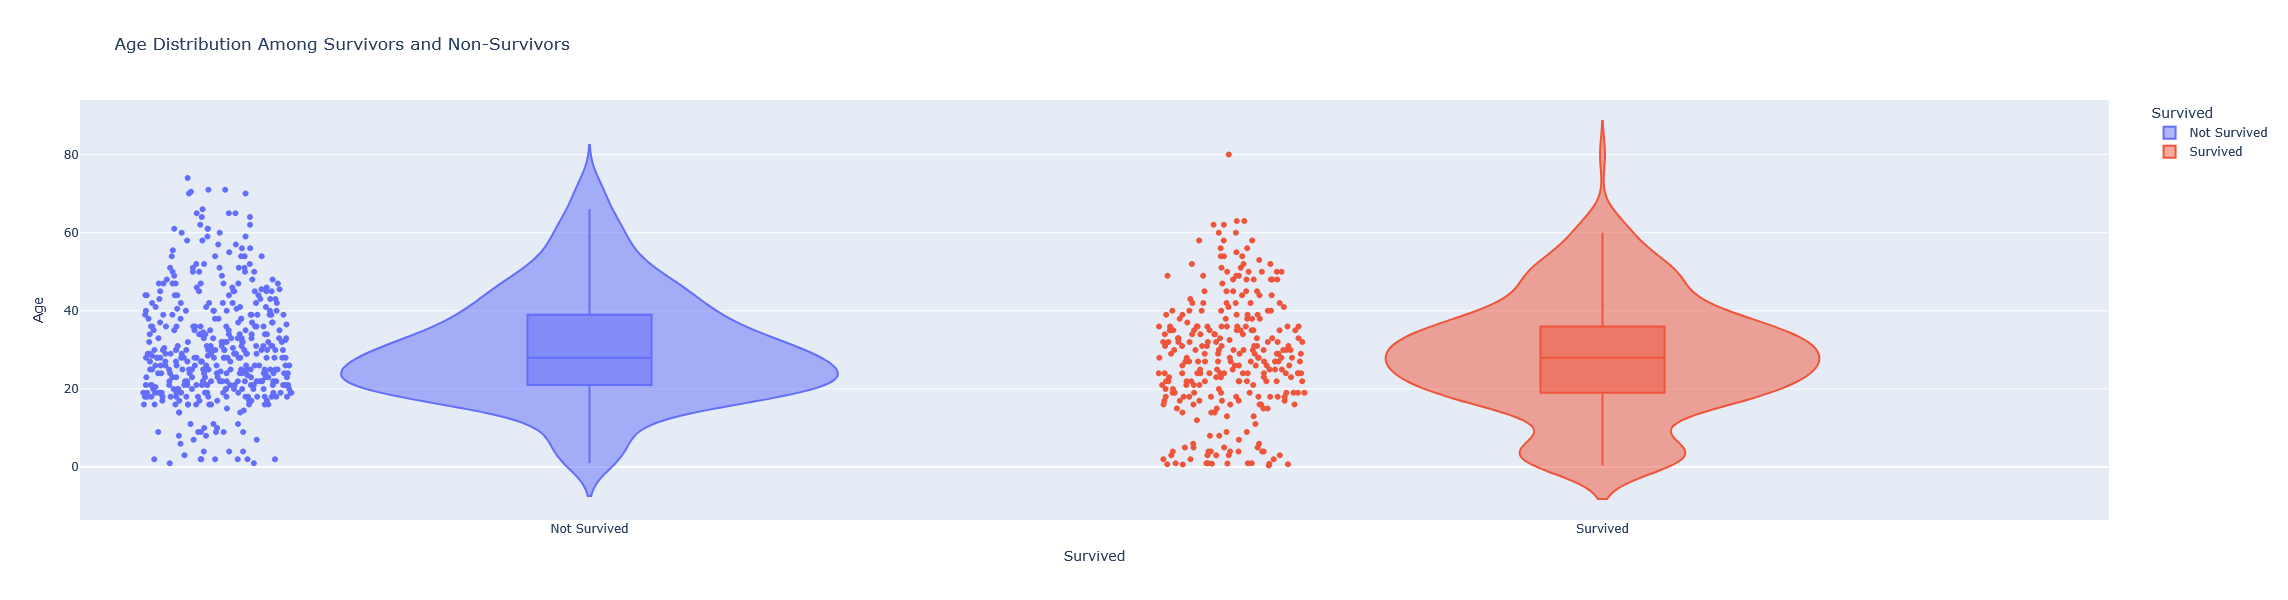

In [35]:
fig5A = px.violin(dataset, x="Survived", y="Age", color="Survived", box=True,
                points="all", title="Age Distribution Among Survivors and Non-Survivors")
fig5A.update_layout( width=1200, height=600)
fig5A.show()

## Fare

Finally we have the passanger fare. Which we can use to create some interesting visualisations of the full dataset

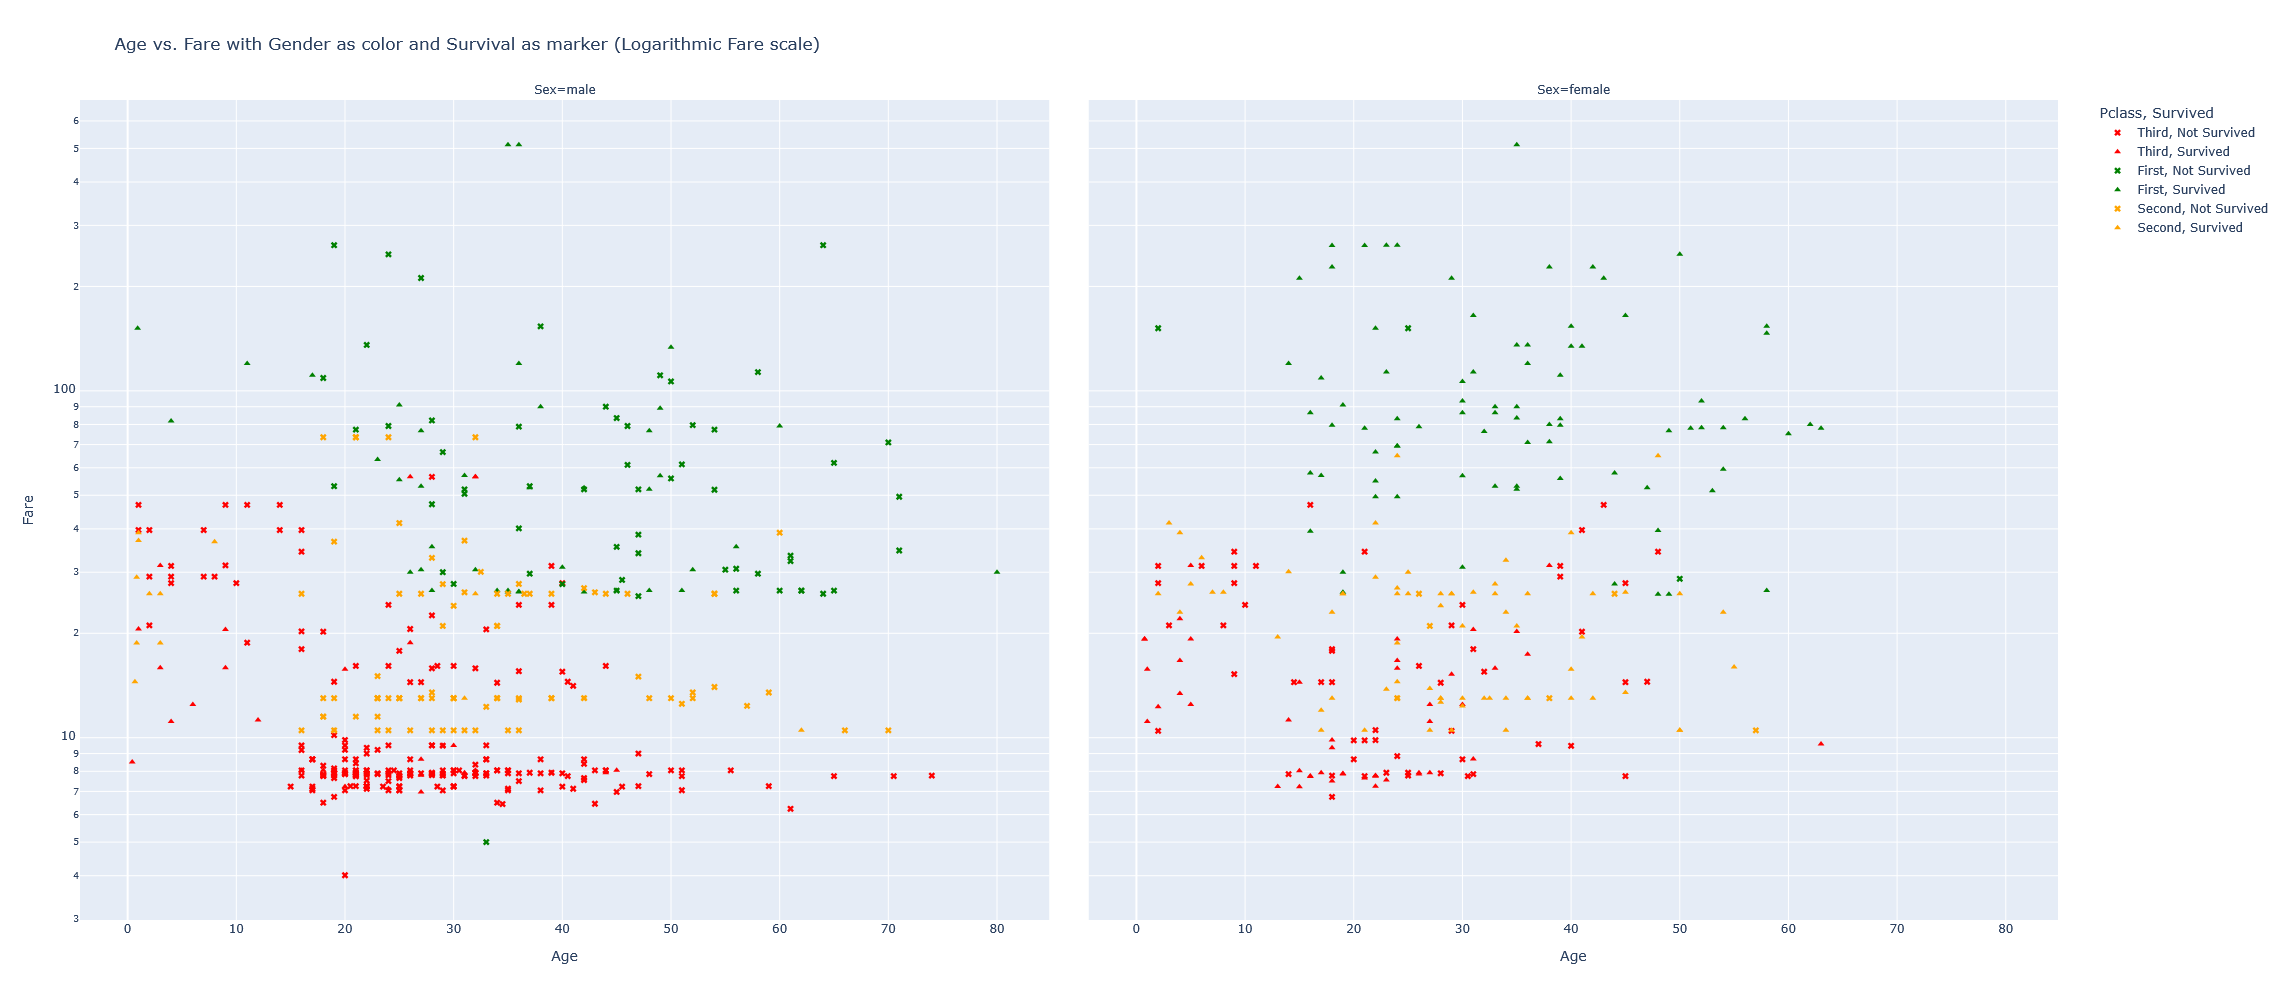

In [36]:
color_map = {'First': 'green', 'Second': 'orange', 'Third': 'red'}
# Create an interactive scatter plot with Plotly
fig5 = px.scatter(
    dataset,
    x='Age',
    y='Fare',
    color='Pclass',
    color_discrete_map=color_map,
    symbol='Survived',
    symbol_map={'Not Survived': 'x', 'Survived': 'triangle-up'},
    log_y=True,
    title='Age vs. Fare with Gender as color and Survival as marker (Logarithmic Fare scale)',
    labels={'Age': 'Age', 'Fare': 'Fare'},
    hover_data=['Name', 'Pclass', 'Embarked'],
    facet_col='Sex',
    width=2400,
    height=1000
)


# Show the plot
fig5.show()


We will do some further work to analyse the Age values later when we do some interpolation of the missing values. 

# 2. Feature Engineering

## Let's take a closer look at the Cabin values

In [37]:
dataset.head(8)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,Not Survived,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,Survived,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,Survived,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,Survived,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,Not Survived,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,Not Survived,Third,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,Not Survived,First,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,Not Survived,Third,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


As we can see the Cabin consists of two values, a deck (given with a letter) and a cabin number which follows. We can also see that there are significant number of unknown values for certain Cabin members.

According to the blueprints the lower numbers started towards the Bow (front) and the higher numbers were towards the stern (back) of the ship. Therefore cabins with lower numbers would have been closer to the breach which occured in the forward compartments.



The Breakdown of the specific decks can be seen below:

<table>
    <tr>
        <td style="width:40%;">
            <table>
                <tr>
                    <th>Deck</th>
                    <th>Description</th>
                </tr>
                <tr>
                    <td>A Deck (Promenade Deck)</td>
                    <td>This deck had 39 First Class cabins, including some of the most luxurious suites.</td>
                </tr>
                <tr>
                    <td>B Deck (Bridge Deck)</td>
                    <td>There were 52 First Class cabins on this deck, including the famous staterooms and suites.</td>
                </tr>
                <tr>
                    <td>C Deck (Shelter Deck)</td>
                    <td>This deck featured 114 First Class cabins and public rooms such as the dining saloon.</td>
                </tr>
                <tr>
                    <td>D Deck (Saloon Deck)</td>
                    <td>This deck included 48 First Class cabins and 22 Second Class cabins.</td>
                </tr>
                <tr>
                    <td>E Deck (Upper Deck)</td>
                    <td>There were 97 Second Class cabins and 50 Third Class cabins on this deck.</td>
                </tr>
                <tr>
                    <td>F Deck (Middle Deck)</td>
                    <td>This deck primarily housed 162 Third Class cabins.</td>
                </tr>
                <tr>
                    <td>G Deck (Lower Deck)</td>
                    <td>This deck contained 84 Third Class cabins and crew accommodations.</td>
                </tr>
            </table>
        </td>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Olympic_%26_Titanic_cutaway_diagram.png/800px-Olympic_%26_Titanic_cutaway_diagram.png" alt="Decks Image" style="width:600px;">
        </td>
    </tr>
</table>


Based on this external data, we can interpolate that the Median passanger location would have been aproximately:


| Class       | Location |
|-------------|----------|
| First Class | B30      |
| Second Class| E60      |
| Third Class | F81      |


Let's use this information to interpolate the cabin of passangers for whom we do not have a cabin number. 

In [38]:
average_cabins = {'First': 'B30',
                  'Second': 'E60',
                  'Third': 'F81'}

In [39]:
dataset['Cabin'] = dataset.apply(lambda row: average_cabins[row['Pclass']] if pd.isna(row['Cabin']) else row['Cabin'], axis=1)

### A number of rows record multiple cabins. Here we will just take the first one listed to make analysis easier

In [40]:
def extract_cabin_clean(cabin):
    if pd.isna(cabin):
        return cabin
    match = re.search(r'\b[A-Z]?\d+\b', cabin)
    return match.group(0) if match else cabin

In [41]:
dataset['Cabin'] = dataset['Cabin'].apply(extract_cabin_clean)

### Let's now extract the Deck for each passanger and see how this corelated with the survivability for passangers:

In [42]:
## we can see that the cabin id consists of a prefix and a 
dataset['Deck'] = dataset['Cabin'].apply(lambda x: x[0] if pd.notna(x) else pd.NA)

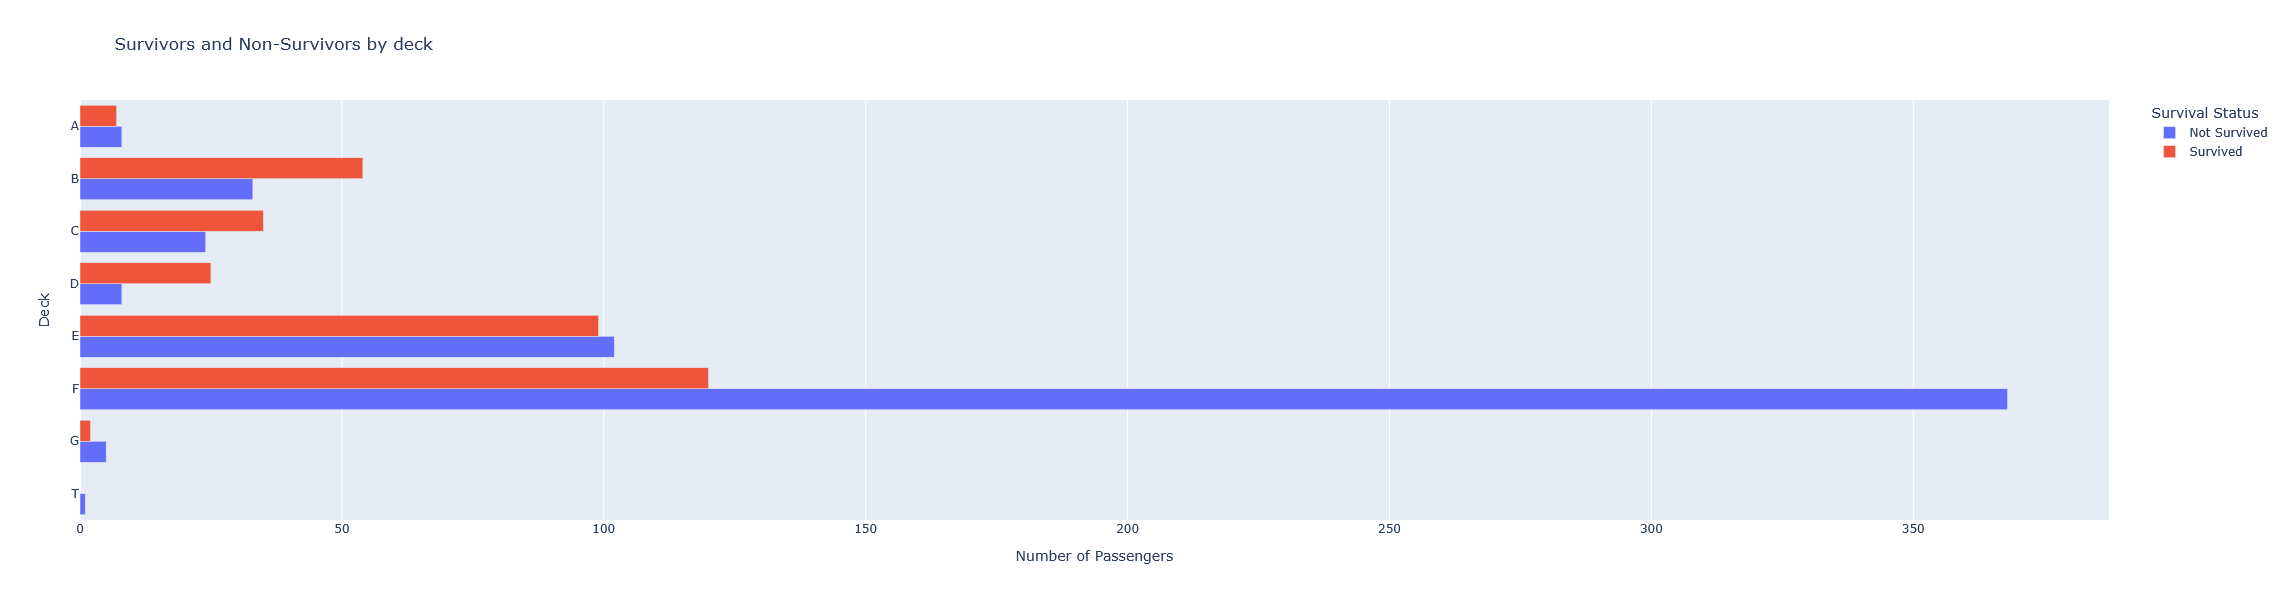

In [43]:
deck_survival_count = dataset.groupby(['Deck', 'Survived']).size().reset_index(name='count')

fig6 = px.bar(deck_survival_count, x="count", y="Deck", color="Survived", barmode="group",
             labels={"count": "Number of Passengers", "Class": "Class", "Survived": "Survival Status"},
             title="Survivors and Non-Survivors by deck",
             orientation='h',
             category_orders={"Deck": sorted(deck_survival_count["Deck"].unique(), reverse=False)}  # Force order
             )

fig6.update_layout(width=1200, height=600)
fig6.show()

Finally let's map the deck to a numerical encoding. 
This will make it easier to use this data for building prediciton models later. Generally you should map catagorical variables using one hot encoding to ensure the model doent infer an ordered relationship.

However, the deck letter actually does have an ordered relationship, that is to say what deck an individuals cabin was on the has a relationship to their survivability. Therefore it makes sense for the model to try and infer a relationship between being farther below deck and a higher likelyhood of dying on the ship. 

### Now cabin number which again has a relationship to the distance to the breach and therefore survival chances

In [44]:
def extract_cabin_number(cabin):
    if pd.notna(cabin):
        parts = cabin.split()
        if len(parts) > 0 and len(parts[0]) > 1:
            return int(parts[0][1:])
    return 60

In [45]:
dataset['Cabin_Number'] = dataset['Cabin'].apply(extract_cabin_number)

In [46]:
dataset.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Cabin_Number
PassengerId,,,,,,,,,,,,,
1,Not Survived,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,F81,S,F,81
2,Survived,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85
3,Survived,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,F81,S,F,81
4,Survived,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123
5,Not Survived,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,F81,S,F,81


In [47]:
#!pip install scikit-learn

## Now let's take a look at the names.

In [48]:
dataset.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Cabin_Number
PassengerId,,,,,,,,,,,,,
1,Not Survived,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,F81,S,F,81
2,Survived,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85
3,Survived,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,F81,S,F,81
4,Survived,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123
5,Not Survived,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,F81,S,F,81


As you can see it is difficult to extrat much from this data. One thing we may be able to extract are the individuals titles, such as Mr, Mrs. etc.. This may tell us something about the individual or their professions or marital status. For example women who are married willl be Mrs,
men in the army may be Capt. Major or Col and uperclass people may be Lady or Sir. We will group these titles into five categorys:

| Category |Title|
|-------------|----------|
| Married Women | Mrs    |
| Single Women | Miss, Mlle, Ms    |
| Single Men | Mr, Master    |
| Professionals | Dr, Rev, Capt, Col, Major     |
| Upper-class | Lady, Countess, Mme, Sir, Jonkheer, Don and Dona      |


This can be extracted from the name varaible using regular expressions:

In [49]:
# Define a function to extract titles
def extract_title(name):
    match = re.search(r'(Mrs\.|Miss|Mr\.|Dr\.|Master\.|Ms\.|Sir\.|Rev\.|Capt\.|Col\.|Major\.|Mlle\.|Jonkheer\.|Lady\.|Don\.|Dona\.|Countess\.|Mme\.)', name)
    return match.group(0) if match else 'Other'

In [50]:
# Define a function to categorize titles
def categorize_title(title):
    if title in ['Lady.', 'Countess.', 'Mme.','Sir.', 'Jonkheer.', 'Don.', 'Dona.']:
        return 'Upper-class'
    elif title in ['Mrs.']:
        return 'Married Women'
    elif title in ['Miss', 'Mlle.', 'Ms.']:
        return 'Single Women'
    elif title in ['Mr.', 'Master.']:
        return 'Single Men'
    elif title in ['Dr.', 'Rev.','Capt.', 'Col.', 'Major.']:
        return 'Professionals'
    else:
        return 'Other'

In [51]:
dataset['Title_Category'] = dataset['Name'].apply(extract_title).apply(categorize_title)

### As we can see from the below plot, it appars that Married women were slightly more likely to survive than those who were not married, but again single men were much more likely to perish

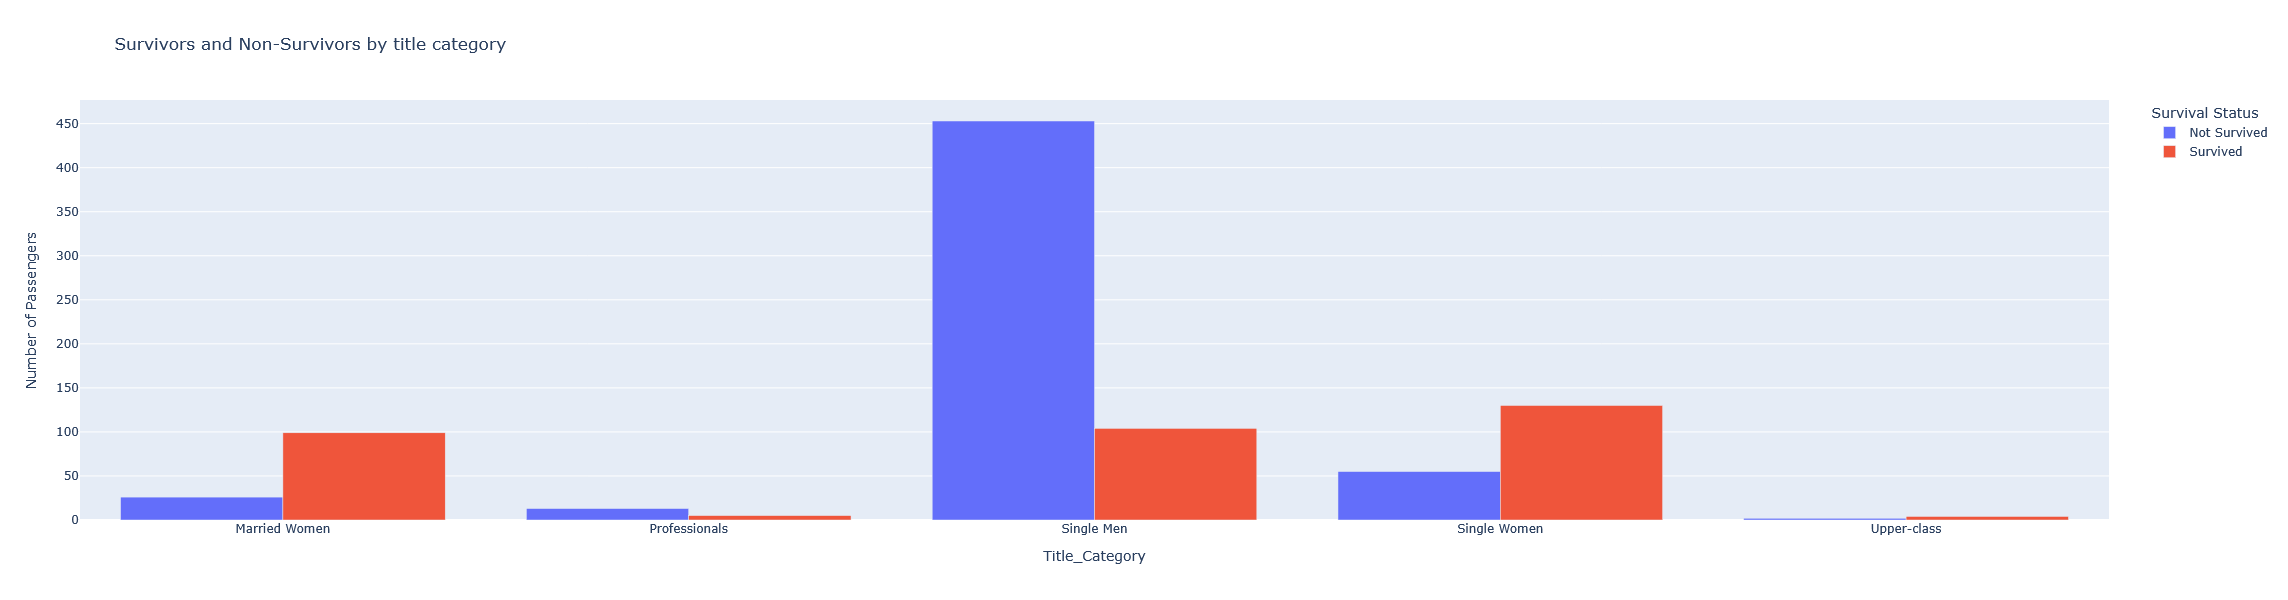

In [52]:
title_category_survival_count = dataset.groupby(['Title_Category', 'Survived']).size().reset_index(name='count')

fig7 = px.bar(title_category_survival_count, x="Title_Category", y="count", color="Survived", barmode="group",
             labels={"count": "Number of Passengers", "Class": "Class", "Survived": "Survival Status"},
             title="Survivors and Non-Survivors by title category")

fig7.update_layout(width=1200, height=600)
fig7.show()

## Ticket ID

The ticket ID is not actually unique, and can be shared by multiple people (for instance if they were in a group). This may be a useful variable to model as well, as those who boarded with others such as friends etc. may have had more chance of survival. 

In [53]:
dataset['Ticket_Count'] = dataset.groupby('Ticket')['Ticket'].transform('count')

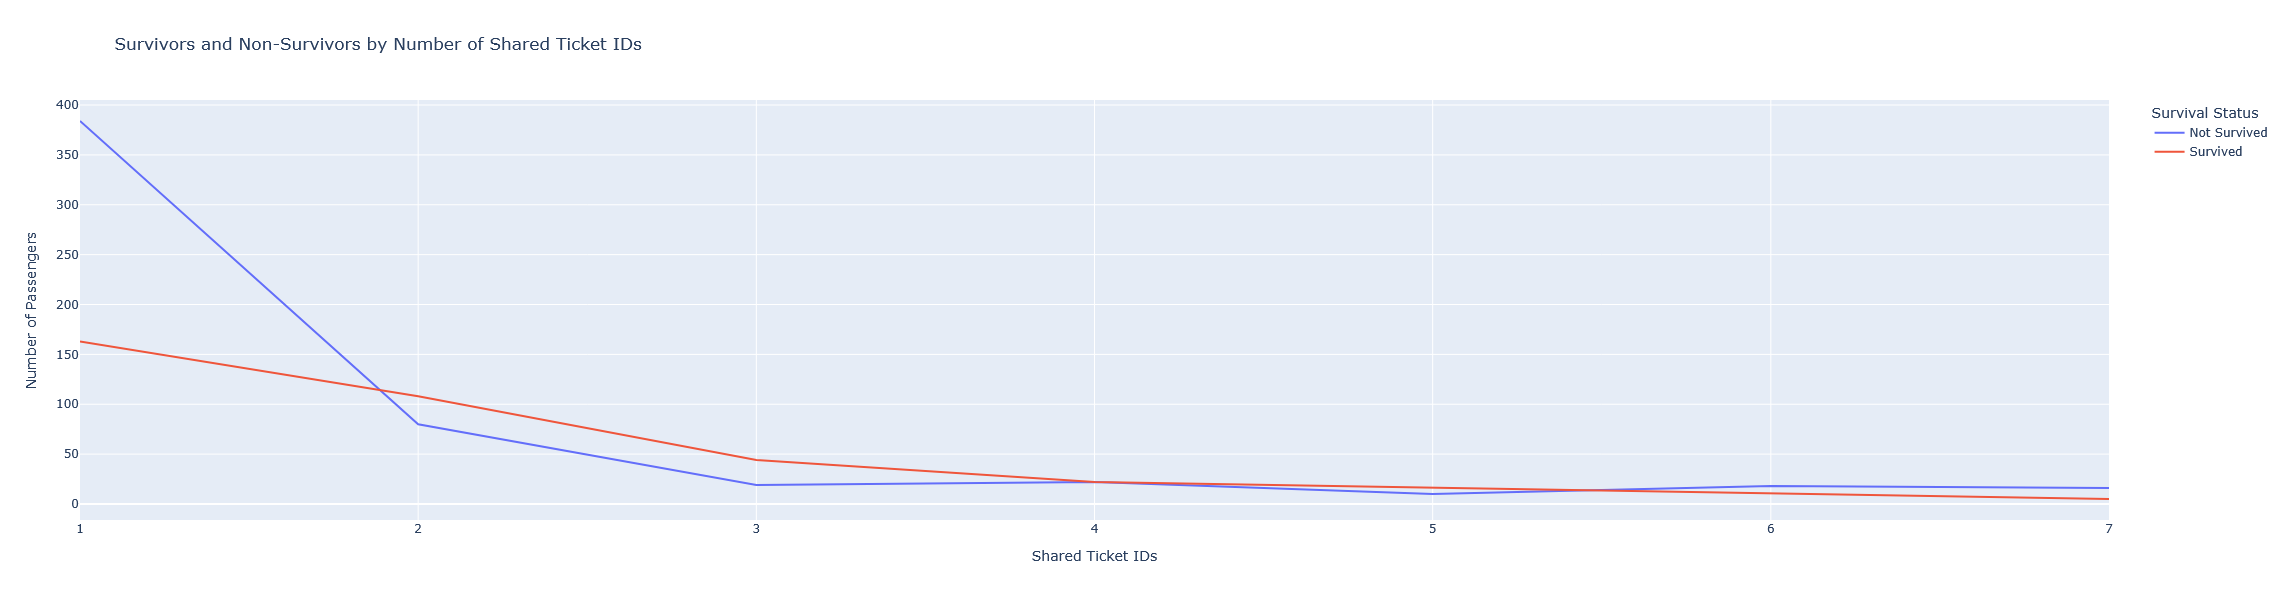

In [54]:
# Grouping data
ticket_count_survival_count = dataset.groupby(['Ticket_Count', 'Survived']).size().reset_index(name='count')

# Creating line plot
fig8 = px.line(ticket_count_survival_count, x="Ticket_Count", y="count", color="Survived",
               labels={"count": "Number of Passengers", "Ticket_Count": "Shared Ticket IDs", "Survived": "Survival Status"},
               title="Survivors and Non-Survivors by Number of Shared Ticket IDs")

# Adjusting layout
fig8.update_layout(width=1200, height=600)
fig8.show()

In [55]:
## Let's output this analysis to a report

In [56]:
import plotly.io as pio

# Define structured layout
structured_figs = [
    [fig1, fig2, fig5B],  # First row (three figures)
    [fig7, fig6],        # Third row (two figures)
    [fig5A,fig4],
    [fig5],              # Second row (one figure, spans full width)
    [fig3, fig8]         # Fourth row (two figures)
]

# Create the HTML structure
html_report = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Titanic Analysis Report</title>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; }
        .container { display: grid; grid-template-columns: 2400px; gap: 20px; }
        .row { display: flex; justify-content: space-between; width: 2400px; }
        .full-width { width: 2400px; }
        .chart { border: 1px solid #ddd; padding: 10px; background-color: #f9f9f9; }
        h1 { text-align: center; }
    </style>
</head>
<body>
    <h1>Titanic Dataset Analysis Report</h1>
    <div class="container">
"""

# Add figures with structured rows
for row in structured_figs:
    row_class = "full-width" if len(row) == 1 else "row"  # Full-width if only one figure
    html_report += f'<div class="{row_class}">'
    for fig in row:
        html_report += f'<div class="chart">{pio.to_html(fig, full_html=False)}</div>'
    html_report += '</div>'

# Close the HTML structure
html_report += """
    </div>
</body>
</html>
"""

# Save as an HTML file
with open("titanic_analysis_report.html", "w", encoding="utf-8") as f:
    f.write(html_report)

# 3. Machine learning Modeling

## Preparing the dataset for model training

### Remove missing values

First let's check if there are any NA values in our database outstanding

In [30]:
dataset.isna().sum()

Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin               0
Embarked            2
Deck                0
Cabin_Number        0
Title_Category      0
Ticket_Count        0
dtype: int64

We could fill these with the mean of the whole dataset, but we can actually be a bit more clever than that.

We can use a method called group based imputation to fill based on statistical properites of the specific groups. Specifically let's go based on the class, sex and title catagory. 

In [31]:
mean_age = dataset.groupby(['Pclass', 'Sex','Title_Category'])['Age'].transform('mean').astype(int)
dataset['Age'] = dataset['Age'].fillna(mean_age)

### Encoding catagorical variables

We one hot encode the catagorical varaibles of Sex, embarked location and title category, to ensure that the model does not infer any ordered relationship between them. 

In [32]:
dataset = pd.get_dummies(dataset, columns = ['Sex'])
dataset = pd.get_dummies(dataset, columns = ['Embarked'])
dataset = pd.get_dummies(dataset, columns = ['Title_Category'])

In [33]:
dataset['Pclass'] = dataset['Pclass'].map({'First':1,'Second':2, "Third":3})
dataset['Survived'] = dataset['Survived'].map({'Not Survived':0, 'Survived':1})

For the deck we will use numerical encoding, as these do have an ordered relationship with regards to how deep into the ship the individuals room was. 

In [34]:
deck_encoding = {
                    'A':1,
                    'B':2,
                    'C':3,
                    'D':4,
                    'E':5,
                    'F':6,
                    'G':7,
                    'T':8
                    }
dataset['Deck'] = dataset['Deck'].map(deck_encoding)

Let's now remove the Non-encoded or non useful features

In [35]:
dataset = dataset.drop(columns=['Name','Ticket','Cabin'])

In [36]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck,Cabin_Number,Ticket_Count,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Category_Married Women,Title_Category_Professionals,Title_Category_Single Men,Title_Category_Single Women,Title_Category_Upper-class
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,6,81,1,False,True,False,False,True,False,False,True,False,False
2,1,1,38.0,1,0,71.2833,3,85,1,True,False,True,False,False,True,False,False,False,False
3,1,3,26.0,0,0,7.9250,6,81,1,True,False,False,False,True,False,False,False,True,False
4,1,1,35.0,1,0,53.1000,3,123,2,True,False,False,False,True,True,False,False,False,False
5,0,3,35.0,0,0,8.0500,6,81,1,False,True,False,False,True,False,False,True,False,False


## Lets train an XGBoost ML Model to predict who survived:

In [37]:

import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer
import xgboost as xgb


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Assuming df is your DataFrame
# Features and target variable
X = dataset.drop(columns=['Survived'])
y = dataset['Survived']

In [ ]:
# Initialize XGBoost classifier
model = xgb.XGBClassifier()


# Define scoring metrics
scoring = {
'accuracy': make_scorer(accuracy_score),
'precision': make_scorer(precision_score),
'recall': make_scorer(recall_score)
}

# Perform cross-validation
cv = StratifiedKFold(n_splits=5)
accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
precision = cross_val_score(model, X, y, cv=cv, scoring='precision')
recall = cross_val_score(model, X, y, cv=cv, scoring='recall')

print(f"Accuracy: {accuracy.mean()}")
print(f"Precision: {precision.mean()}")
print(f"Recall: {recall.mean()}")


### Let's take a look at which features the model finds the most important

In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Features and target variable
X = dataset.drop(columns=['Survived'])
y = dataset['Survived']

# Initialize and fit the XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X, y)

# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

print(feature_importance_df)


## Let's evaluate the model on the holdout dataset

First let's simlify the data cleaning process into a single method named prepare_dataset. 

In [ ]:
def prepare_dataset(dataset):
    ### Define the average cabins 
    average_cabins = {1: 'B30',2: 'E60', 3: 'F81'}
    
    ### Clean cabin data
    dataset['Cabin'] = dataset.apply(lambda row: average_cabins[row['Pclass']] if pd.isna(row['Cabin']) else row['Cabin'], axis=1)
    dataset['Cabin'] = dataset['Cabin'].apply(extract_cabin_clean)
    
    ### Get the Deck and cabin number
    dataset['Deck'] = dataset['Cabin'].apply(lambda x: x[0] if pd.notna(x) else pd.NA)
    dataset['Cabin_Number'] = dataset['Cabin'].apply(extract_cabin_number)

    
    ## Extract the title category
    dataset['Title_Category'] = dataset['Name'].apply(extract_title).apply(categorize_title)
    
    dataset['Ticket_Count'] = dataset.groupby('Ticket')['Ticket'].transform('count')

    mean_age = dataset.groupby(['Pclass', 'Sex','Title_Category'])['Age'].transform('mean').astype(int)
    dataset['Age'] = dataset['Age'].fillna(mean_age)
    
    
    ### One hot encode catagorical data
    dataset = pd.get_dummies(dataset, columns = ['Sex'])
    dataset = pd.get_dummies(dataset, columns = ['Embarked'])
    dataset = pd.get_dummies(dataset, columns = ['Title_Category'])
    
    ### Encode the deck
    deck_encoding = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8}
    dataset['Deck'] = dataset['Deck'].map(deck_encoding)
    
    #dataset = dataset.drop(columns=['Name','Ticket','Cabin'])

    return dataset

### Now let's reload both datasets and process them

In [ ]:
train_dataset =  pd.read_csv("titanic\\train.csv", index_col ="PassengerId")
test_dataset =  pd.read_csv("titanic\\test.csv", index_col ="PassengerId")

In [ ]:
train_dataset = prepare_dataset(train_dataset)
test_dataset = prepare_dataset(test_dataset)


In [ ]:
test_dataset